In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

plt.rcParams["figure.figsize"] = (8,8)

# Perceptrón

## 1. Introduction

Neural Networks are computational models whose objective is to replicate information processing methods analogous to those found in neurons in the brain.

A neural network is a collection of interconnected neurons that learn incrementally from their enviroment, that is, the supplied data, to capture linear and non-linear trends in complex data, so that it provides predictions for new situations.

From a computational point of view, the brain is composed of information-processing elements called neurons. Neurons are made up of three essential elements:

1. The dendrites whose function is to receive the electrical pulses emitted by other neurons. 
2. The body of the neuron, where the nucleus is located, which receives the pulses and transforms them.
3. Once the pulses are processed, they are delivered to other neurons through the axon.

<center>
    <img src="Images/Neurona_tagged.png" width="600">

**Fig. 1:** Principal Component of a Neuron.
</center>

The Perceptron is one of the simples ANN architectures proposed by Frank Rosenblatt in 1957. The Perceptron training algorithm proposed by Rosenblatt was inspired by Hebb's rule. Donal Hebb suggested that when a biological neuron often triggers another neuron, the connection between these two neurons grows stronger. This idea was later summarized by Siegrid Löwel: "Cells that fire together, wire together". This rule later became known as Hebb's rule; that is the connection wegith between two neurons is increased whenever they have the same output [1].

Perceptrons are trained using a variant of this rule that considers the error made by the network. The Perceptron is fed one training instance at a time, and for each instance it makes its prediction. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the input that would have contributed to the correct prediction [1].

## 2. Logic Gates

An introductory exercise to neural networks consists of selecting the appropriate weight factors for the creation of logic gates. Figure 2 includes the schema for the perceptron as a logic gate discussed in class.

<center>
    <img src="Images/NeuralNetwork.png" width="600">

**Fig. 2:** Perceptron as Logic Gate.
</center>

### **OR** Gate

The table used to represent the boolean expression of a logic gate is known as Truth Table. The corresponding truth table for the **OR** gate is:  



| $x_1$ | $x_2$   | y |
| --- |---| ---:|
| 0  | 0  | 0  |
| 0  | 1  | 1  |
| 1  | 0  | 1  |
| 1  | 1  | 1  |

<center>
    Table 1. Truth Table of the **OR** Gate
</center>

The following code was retrieved from [2].  The four instances ($x_1$, $x_2$) are stored as tuples in `test_inputs` and the corresponding output are in `test_outputs`. Observe that `weight1` corresponds to the weight of $x_1$, `weight2`to the weight of $x_2$ and `bias` to the bias.

In [2]:
bias = 0.0
weight1 = 0.0
weight2 = 0.0

# Input and Outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
test_outputs = [0, 1, 1, 1]
outputs = []

for test_input, test_output in zip(test_inputs, test_outputs):
    # Linear Combination
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    
    # Activation Function (Step Function)
    output = int(linear_combination >= 0)
    
    # Save if the prediction is correct ('Yes') or not ('No')
    is_correct_string = 'Yes' if output == test_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    
output_frame = pd.DataFrame(outputs, columns=['X1', 'X2', 'Linear Combination', 'Activation Output', 'Correct?'])

print(output_frame.to_string(index=False))

 X1  X2  Linear Combination  Activation Output Correct?
  0   0                 0.0                  1       No
  0   1                 0.0                  1      Yes
  1   0                 0.0                  1      Yes
  1   1                 0.0                  1      Yes


**T1.** Which are the correct values of `weight1`,`weight2` anb `bias` such that the perceptron acts as the logical gate **OR**? Justify your answer by using the concepts: *discriminant function* and *decision boundary*. You can add and schema if you need it.

In [3]:
bias = -1
weight1 = 1
weight2 = 1

# Input and Outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
test_outputs = [0, 1, 1, 1]
outputs = []


for test_input, test_output in zip(test_inputs, test_outputs):
    # Linear Combination
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    
    # Activation Function (Step Function)
    output = int(linear_combination >= 0)
    
    # Save if the prediction is correct ('Yes') or not ('No')
    is_correct_string = 'Yes' if output == test_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    
output_frame = pd.DataFrame(outputs, columns=['X1', 'X2', 'Linear Combination', 'Activation Output', 'Correct?'])

print(output_frame.to_string(index=False))

 X1  X2  Linear Combination  Activation Output Correct?
  0   0                  -1                  0      Yes
  0   1                   0                  1      Yes
  1   0                   0                  1      Yes
  1   1                   1                  1      Yes


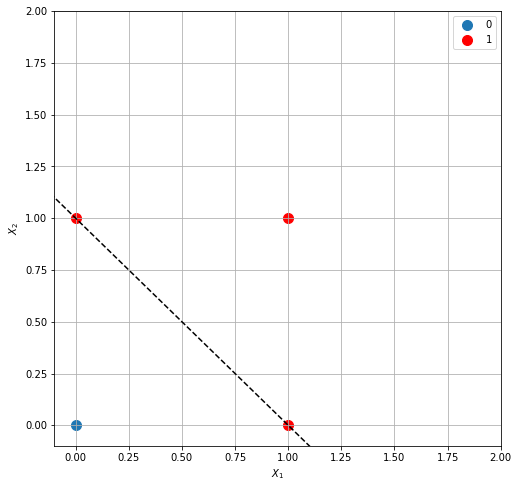

In [4]:
list1 = [(row[0], row[1]) for row in test_inputs if row[0] == 1 or row[1] == 1]
list0 = [(row[0], row[1]) for row in test_inputs if row[0] == 0 and row[1] == 0]

x_axis_0 = [row[0] for row in list0]
y_axis_0 = [row[1] for row in list0]


x_axis_1 = [row[0] for row in list1]
y_axis_1 = [row[1] for row in list1]

x_axis = np.linspace(-1,2,10)
y_axis = - x_axis*weight1 - bias


plt.scatter(x_axis_0, y_axis_0, label = 0, s = 100)
plt.scatter(x_axis_1, y_axis_1, color = 'r', label = 1, s = 100)
plt.plot(x_axis, y_axis, '--', color = 'black')
plt.xlim([-.1,2])
plt.ylim([-.1,2])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid()
plt.legend()
plt.show()

**Write your answer here!** 



# Answer

The decision boundary is defined by the discriminant function = 0. The discriminant function is the equation that will help us define where a boundary exists. Given that equation we can classify where a given point belongs. In this case, our disciminant function is given by "weight1 * test_input[0] + weight2 * test_input[1] + bias" with the test inputs acting as the input variables. 

While testing, we can check the outputs with the ones we're supposed to have with the OR logic gate, for this we created a table to reference it. We figured out the values -1 , 1 and 1 for bias, weight1 and weight2 (respectively) worked. And after that we plotted in order to succesfully showcase our values.

### Compuerta **AND**

The corresponding truth table for the **AND** gate is: 


| $x_1$ | $x_2$   | y |
| ------ |---------| ------:|
| 0  | 0  | 0  |
| 0  | 1  | 0  |
| 1  | 0  | 0  |
| 1  | 1  | 1  |

<center>
    Table 2. Truth Table of the **AND**.
</center>

**T2.** Which are the correct values of `weight1`,`weight2` anb `bias` such that the perceptron acts as the logical gate **AND**? Justify your answer by using the concepts: *discriminant function* and *decision boundary*. You can add and schema if you need it. 

Note that you need to write the inputs/outputs for the gate **AND**.

In [5]:
weight1 = 1
weight2 = 1
bias = -2


# Input and Outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
test_outputs = [0, 0, 0, 1]
outputs = []


for test_input, test_output in zip(test_inputs, test_outputs):
    # Linear Combination
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    
    # Activation Function (Step Function)
    output = int(linear_combination >= 0)
    
    # Save if the prediction is correct ('Yes') or not ('No')
    is_correct_string = 'Yes' if output == test_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    
output_frame = pd.DataFrame(outputs, columns=['X1', 'X2', 'Linear Combination', 'Activation Output', 'Correct?'])

print(output_frame.to_string(index=False))

 X1  X2  Linear Combination  Activation Output Correct?
  0   0                  -2                  0      Yes
  0   1                  -1                  0      Yes
  1   0                  -1                  0      Yes
  1   1                   0                  1      Yes


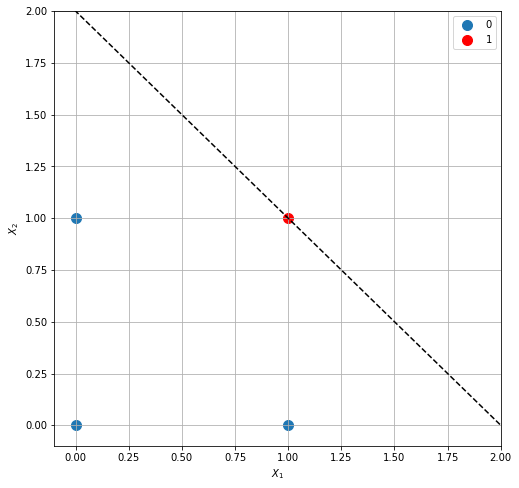

In [6]:
list1 = [(row[0], row[1]) for row in test_inputs if row[0] == 1 and row[1] == 1]
list0 = [(row[0], row[1]) for row in test_inputs if row[0] == 0 or row[1] == 0]

x_axis_0 = [row[0] for row in list0]
y_axis_0 = [row[1] for row in list0]


x_axis_1 = [row[0] for row in list1]
y_axis_1 = [row[1] for row in list1]

x_axis = np.linspace(-1,2,10)
y_axis = - x_axis*weight1 - bias


plt.scatter(x_axis_0, y_axis_0, label = 0, s = 100)
plt.scatter(x_axis_1, y_axis_1, color = 'r', label = 1, s = 100)
plt.plot(x_axis, y_axis, '--', color = 'black')
plt.xlim([-.1,2])
plt.ylim([-.1,2])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid()
plt.legend()
plt.show()

# Answer

The decision boundary is defined by the discriminant function = 0. The discriminant function is the equation that will help us define where a boundary exists. Given that equation we can classify where a given point belongs. In this case, our disciminant function is given by " weight1 * test_input[0] + weight2 * test_input[1] + bias" with the test inputs acting as the input variables.

While testing, we can check the outputs with the ones we're supposed to have with the AND logic gate, for this we created a table to reference it. We figured out the values -2 , 1 and 1 for bias, weight1 and weight2 (respectively) worked. And after that we plotted in order to succesfully showcase our values.

### Compuerta **NOT**

The corresponding truth table for the **NOT** gate is: 




| $x_1$ | $y$   |
| ------ | ------:|
| 0  | 1  |
| 1  | 0  |

<center>
    Table 3. Truth Table of the **NOT**.
</center>


**T3.** Which are the correct values of `weight1` anb `bias` such that the perceptron acts as the logical gate **NOT**? Justify your answer by using the concepts: *discriminant function* and *decision boundary*. You can add and schema if you need it. 

The following code is the same as in the previous tasks. Adapt the code in order to create a Perceptron which acts as the logical gate **NOT**.

In [7]:
weight1 = -1
bias = 0



# Input and Outputs
test_inputs = [0,1]  
test_outputs = [1,0]
outputs = []

for test_input, test_output in zip(test_inputs, test_outputs):
    # Linear Combination
    linear_combination = weight1 * test_input  + bias
    
    # Activation Function (Step Function)
    output = int(linear_combination >= 0)
    
    # Save if the prediction is correct ('Yes') or not ('No')
    is_correct_string = 'Yes' if output == test_output else 'No'
    outputs.append([test_input, linear_combination, output, is_correct_string])
    
output_frame = pd.DataFrame(outputs, columns=['X1', 'Linear Combination', 'Activation Output', 'Correct?'])

print(output_frame.to_string(index=False))

 X1  Linear Combination  Activation Output Correct?
  0                   0                  1      Yes
  1                  -1                  0      Yes


# Note: la gráfica de esta no sé si está bien xd

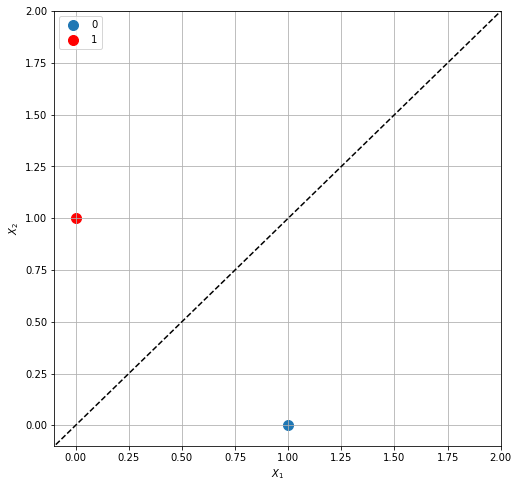

In [8]:
list1 = [(0,1)]
list0 = [(1,0)]

x_axis_0 = [row[0] for row in list0]
y_axis_0 = [row[1] for row in list0]


x_axis_1 = [row[0] for row in list1]
y_axis_1 = [row[1] for row in list1]

x_axis = np.linspace(-1,2,10)
y_axis = - x_axis*weight1 - bias


plt.scatter(x_axis_0, y_axis_0, label = 0, s = 100)
plt.scatter(x_axis_1, y_axis_1, color = 'r', label = 1, s = 100)
plt.plot(x_axis, y_axis, '--', color = 'black')
plt.xlim([-.1,2])
plt.ylim([-.1,2])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid()
plt.legend()
plt.show()

# Answer

The decision boundary is defined by the discriminant function = 0. The discriminant function is the equation that will help us define where a boundary exists. Given that equation we can classify where a given point belongs. In this case, our disciminant function is given by "weight1 * test_input  + bias" with the test inputs acting as the input variables.

While testing, we can check the outputs with the ones we're supposed to have with the NOT logic gate, for this we created a table to reference it. We figured out the values 0 and -1 for bias and weight1 (respectively) worked. And after that we plotted in order to succesfully showcase our values.

### Compuerta **XOR**

The corresponding truth table for the **XOR** gate is: 


| $x_1$ | $x_2$   | y |
| ------ |---------| ------:|
| 0  | 0  | 0  |
| 0  | 1  | 1  |
| 1  | 0  | 1  |
| 1  | 1  | 0  |

<center>
    Table 3. Truth Table of the **XOR**.
</center>




**T4.** Which are the correct values of `weight1`, `weight2` anb `bias` such that the perceptron acts as the logical gate **XOR**? Justify your answer by using the concepts: *discriminant function* and *decision boundary*. You can add and schema if you need it. 

The following code is the same as in the previous tasks. Adapt the code in order to create a Perceptron which acts as the logical gate **XOR**.

In [9]:
weight1 = -2
weight2 = -2
bias = -1



# Input and Outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
test_outputs = [0, 1, 1, 0]
outputs = []

for test_input, test_output in zip(test_inputs, test_outputs):
    # Linear Combination
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    
    # Activation Function (Step Function)
    output = int(linear_combination >= 0)
    
    # Save if the prediction is correct ('Yes') or not ('No')
    is_correct_string = 'Yes' if output == test_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    
output_frame = pd.DataFrame(outputs, columns=['X1', 'X2', 'Linear Combination', 'Activation Output', 'Correct?'])

print(output_frame.to_string(index=False))

 X1  X2  Linear Combination  Activation Output Correct?
  0   0                  -1                  0      Yes
  0   1                  -3                  0       No
  1   0                  -3                  0       No
  1   1                  -5                  0      Yes


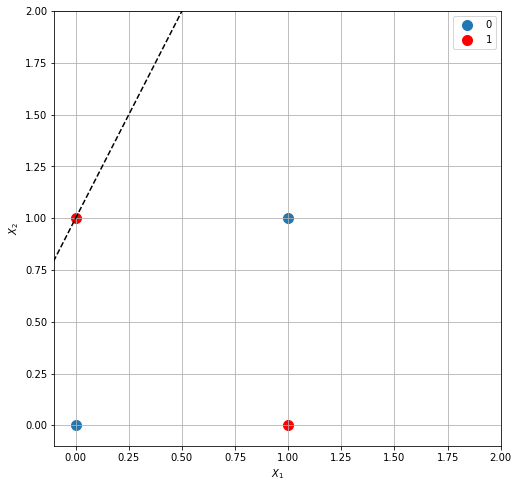

In [10]:
list1 = [(row[0], row[1]) for row in test_inputs if (row[0] == 0 and row[1] == 1) or (row[0] == 1 and row[1] == 0)]
list0 = [(row[0], row[1]) for row in test_inputs if (row[0] == 0 and row[1] == 0) or (row[0] == 1 and row[1] == 1)]

x_axis_0 = [row[0] for row in list0]
y_axis_0 = [row[1] for row in list0]


x_axis_1 = [row[0] for row in list1]
y_axis_1 = [row[1] for row in list1]

x_axis = np.linspace(-1,2,10)
y_axis = - x_axis*weight1 - bias


plt.scatter(x_axis_0, y_axis_0, label = 0, s = 100)
plt.scatter(x_axis_1, y_axis_1, color = 'r', label = 1, s = 100)
plt.plot(x_axis, y_axis, '--', color = 'black')
plt.xlim([-.1,2])
plt.ylim([-.1,2])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid()
plt.legend()
plt.show()

# Answer

The decision boundary is defined by the discriminant function = 0. The discriminant function is the equation that will help us define where a boundary exists. Given that equation we can classify where a given point belongs. In this case, our disciminant function is given by "weight1 * test_input[0] + weight2 * test_input[1] + bias" with the test inputs acting as the input variables.

While testing, we can check the outputs with the ones we're supposed to have with the XOR logic gate, for this we created a table to reference it. For this particular case, however, we can't determine the correct values. Why? Because the XOR logic gate isn't linearly separable. And that completely nullifies our equation. 

## 3. Perceptron Model

The implementation of the Perceptron of this activity will be done by using an Object Oriented Programming style. Consider the following class.

In [11]:
class Perceptron:
    """
    Class that simulates how a perceptron works
    
    Parameters:
    n_inputs: is the number of inputs that the perceptron will receive, for instance, if the inputs has 2 columns the n_inputs is 2
    max_iterations: is the maximum number of iteration the fit will do
    learning_rate: is the learning rate
    
    
    Attributes:
    self.max_iterations: is the maximum number of iteration the fit will do
    self.n_inputs: is the number of inputs that the perceptron will receive, for instance, if the inputs has 2 columns the n_inputs is 2
    self.weights: weights for the model, the number of the weights is defined by the n_inputs
    self.bias: interception
    self.learning_rate: is the learning rate
    self.memory: list to save the weights and bias of each iteration
    """
    
    def __init__(self, n_inputs, max_iterations=200, learning_rate=0.01):
        """
        initializer of the class
        
        Input:
        n_inputs: is the number of inputs that the perceptron will receive, for instance, if the inputs has 2 columns the n_inputs is 2
        max_iterations: is the maximum number of iteration the fit will do
        learning_rate: is the learning rate
    
        
        Output:
        attributes initialized
        """
        self.max_iterations = max_iterations
        self.n_inputs = n_inputs

        self.weights = np.array([0 for _ in range(n_inputs)])
        self.bias = 0
        self.learning_rate = learning_rate
        
        self.memory = []
        
        
    def prediction(self, inputs):
        """
        Function to predict the activation of the perceptron, either 1 or 0
        
        Input:
        inputs: list of values that are use for predicting
        
        Output:
        return a list of 1 or 0, belonging to the activation of each input
        """
        inputs = np.array(inputs)
        activation = []
        
        for i in inputs:
            aux = sum(i * self.weights) + self.bias
            if aux >= 0:
                activation.append(1)
                
            else:
                activation.append(0)
        
        return activation
    
    
    def __prediction_for_fit(self, simple_input):
        """
        Private method to predict use in fit
        
        input:
        list of values belonging to 1 row
        
        output:
        return the activation of the perceptron
        
        """
        aux = sum(simple_input * self.weights) + self.bias
        if aux >= 0:
            return 1

        else:
            return 0
    
    def fit(self, train_inputs, train_labels):
        """
        Function to fit the perceptron due to given values 
        
        Input:
        train_inputs: row for training the model
        train_labels: target values for training the model
        
        
        Output:
        does not return nothing, but fit the model.
        """
        
        train_inputs = np.array(train_inputs)
        
        #bunch of operations seen in classes, we think is quite intuitive
        for epoch in range(self.max_iterations):
            for row, real_value in zip(train_inputs, train_labels):
                aux = (real_value - self.__prediction_for_fit(row)) 
                self.weights = self.weights + self.learning_rate * aux * row 
                self.bias = self.bias + self.learning_rate * aux
                
            #saving the weights and bias of this last iteration
            self.memory.append([self.weights[:], self.bias])
                
                
    def generate_accuracies(self, data_test, target_test):
        """
        Function to generate all the accuracy values for each weight and bias saved in memory attribute 
        
        input:
        data_test: row for testing the model
        target_test: test targets
        
        outputs:
        return all the error rates for each weight and  bias
        
        """
        data_test = np.array(data_test)
        accuracies = []
        
        #ietating in each weight and bias
        for i in self.memory:
            activation = []
            #iterating in each data_test, this is what prediction does
            for row in data_test:
                aux = sum(row * i[0]) + i[1]
                if aux >= 0:
                    activation.append(1)
                
                else:
                    activation.append(0)
             
            #getting the error rate (1 - accuracy)
            accuracies.append(1- metrics.accuracy_score(target_test, activation))
            
        return accuracies

**T5.** Complete the function `__init__(self, n_inputs, max_iterations=200, learning_rate=0.01`. It should be initialized `self.weight` as a vector with zero values and `self.bias` to zero.

**T6.** Complete the function `Perceptron.fit(self, train_inputs, train_labels)`. The function should inputs `train_inputs` and `train_labels`. The function should apply *The Perceptron Algorithm* in order to obtain the best values for the weight vector and bias. Observe that the class has the following attributes `max_iterations` and `learning_rate`. After each epoch (iteration) print the current *epoch*, *learning_rate* and *missing* items.

**T7.** Complete the function `Perceptron.predict(self, inputs)` which should return the predicted values for all instances in `inputs`.

You can create "private" methods and attributes.

**T8.** In the following sections **A. Perceptron OR**, **A. Perceptron OR**, **A. Perceptron OR**, **A. Perceptron OR** train a perceptron model in order to acts as the corresponding logical gate. Do you need 200 iterations? Modify the `max_iterations`if you need it.

In each case print the corresponding *weights* and *bias.

### A. Perceptron OR

In [12]:
# Create the perceptron model for the gate OR.

perceptron_or = Perceptron(n_inputs = 2, max_iterations=20, learning_rate=0.01)

In [13]:
# Input and Outputs
test_inputs_or = [(0, 0), (0, 1), (1, 0), (1, 1)]
test_inputs_or = np.array(test_inputs_or)

test_outputs_or = [0, 1, 1, 1]

In [14]:
# Training
perceptron_or.fit(test_inputs_or, test_outputs_or)

In [15]:
# Print the weights and bias
perceptron_or.weights

array([0.01, 0.01])

In [16]:
perceptron_or.bias

-0.01

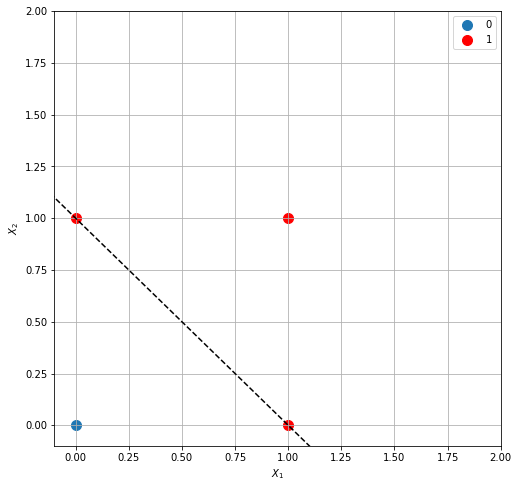

In [17]:
list1 = [(row[0], row[1]) for row in test_inputs_or if row[0] == 1 or row[1] == 1]
list0 = [(row[0], row[1]) for row in test_inputs_or if row[0] == 0 and row[1] == 0]

x_axis_0 = [row[0] for row in list0]
y_axis_0 = [row[1] for row in list0]


x_axis_1 = [row[0] for row in list1]
y_axis_1 = [row[1] for row in list1]

x_axis = np.linspace(-1,2,10)
y_axis = (- x_axis*perceptron_or.weights[0] - perceptron_or.bias)/perceptron_or.weights[1]


plt.scatter(x_axis_0, y_axis_0, label = 0, s = 100)
plt.scatter(x_axis_1, y_axis_1, color = 'r', label = 1, s = 100)
plt.plot(x_axis, y_axis, '--', color = 'black')
plt.xlim([-.1,2])
plt.ylim([-.1,2])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid()
plt.legend()
plt.show()

### B. Perceptron AND

In [18]:
# Create the perceptron model for the gate AND.

perceptron_and = Perceptron(n_inputs = 2, max_iterations=20, learning_rate=0.01)

In [19]:
# Input and Outputs
test_inputs_and =  [(0, 0), (0, 1), (1, 0), (1, 1)]
test_inputs_and = np.array(test_inputs_and)

test_outputs_and = [0, 0, 0, 1]

In [20]:
# Training
perceptron_and.fit(test_inputs_and, test_outputs_and)

In [21]:
# Print the weights and bias
perceptron_and.weights

array([0.02, 0.01])

In [22]:
perceptron_and.bias

-0.03

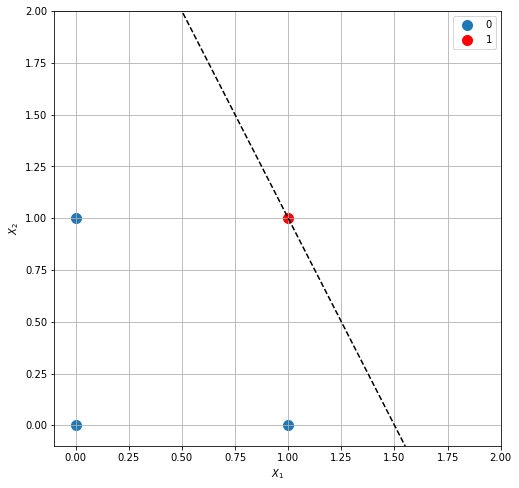

In [23]:
list1 = [(row[0], row[1]) for row in test_inputs_and if row[0] == 1 and row[1] == 1]
list0 = [(row[0], row[1]) for row in test_inputs_and if row[0] == 0 or row[1] == 0]

x_axis_0 = [row[0] for row in list0]
y_axis_0 = [row[1] for row in list0]


x_axis_1 = [row[0] for row in list1]
y_axis_1 = [row[1] for row in list1]

x_axis = np.linspace(-1,2,10)
y_axis = (- x_axis*perceptron_and.weights[0] - perceptron_and.bias)/perceptron_and.weights[1]


plt.scatter(x_axis_0, y_axis_0, label = 0, s = 100)
plt.scatter(x_axis_1, y_axis_1, color = 'r', label = 1, s = 100)
plt.plot(x_axis, y_axis, '--', color = 'black')
plt.xlim([-.1,2])
plt.ylim([-.1,2])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid()
plt.legend()
plt.show()

### C. Perceptron NOT

In [24]:
# Create the perceptron model for the gate NOT.

perceptron_not = Perceptron(n_inputs = 1, max_iterations=20, learning_rate=0.01)

In [25]:
# Input and Outputs
test_inputs_not = [0, 1]
test_inputs_not = np.array(test_inputs_not)

test_outputs_not = [1, 0]

In [26]:
# Training
perceptron_not.fit(test_inputs_not, test_outputs_not)

In [27]:
# Print the weights and bias
perceptron_not.weights

array([-0.01])

In [28]:
perceptron_not.bias

0.0

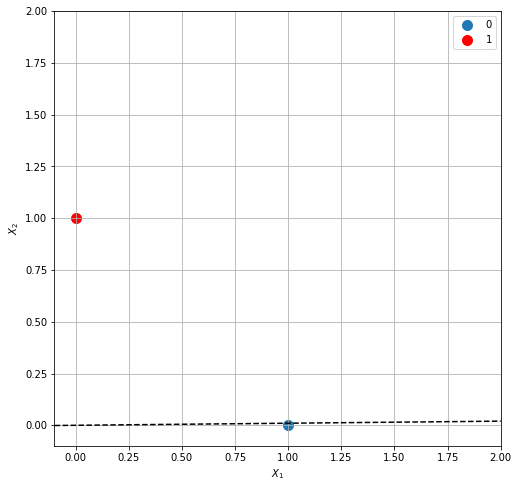

In [29]:
list1 = [(0,1)]
list0 = [(1,0)]

x_axis_0 = [row[0] for row in list0]
y_axis_0 = [row[1] for row in list0]


x_axis_1 = [row[0] for row in list1]
y_axis_1 = [row[1] for row in list1]

x_axis = np.linspace(-1,2,10)
y_axis = - x_axis*perceptron_not.weights[0] - perceptron_not.bias


plt.scatter(x_axis_0, y_axis_0, label = 0, s = 100)
plt.scatter(x_axis_1, y_axis_1, color = 'r', label = 1, s = 100)
plt.plot(x_axis, y_axis, '--', color = 'black')
plt.xlim([-.1,2])
plt.ylim([-.1,2])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid()
plt.legend()
plt.show()

### D. Perceptron XOR

In [30]:
# Create the perceptron model for the gate XOR.

perceptron_xor = Perceptron(n_inputs = 2, max_iterations=20, learning_rate=0.01)

In [31]:
# Input and Outputs
test_inputs_xor = [(0, 0), (0, 1), (1, 0), (1, 1)]
test_inputs_xor = np.array(test_inputs_xor)

test_outputs_xor = [0, 1, 1, 0]

In [32]:
# Training
perceptron_xor.fit(test_inputs_xor, test_outputs_xor)

In [33]:
# Print the weights and bias
perceptron_xor.weights

array([-0.01,  0.  ])

In [34]:
perceptron_xor.bias

0.0

<ipython-input-35-0194ec0ba84e>:12: RuntimeWarning: divide by zero encountered in true_divide
  y_axis = (- x_axis*perceptron_xor.weights[0] - perceptron_xor.bias)/perceptron_xor.weights[1]
<ipython-input-35-0194ec0ba84e>:12: RuntimeWarning: invalid value encountered in true_divide
  y_axis = (- x_axis*perceptron_xor.weights[0] - perceptron_xor.bias)/perceptron_xor.weights[1]


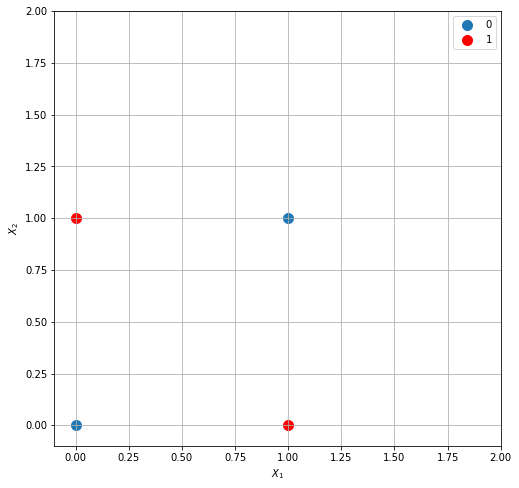

In [35]:
list1 = [(row[0], row[1]) for row in test_inputs_xor if (row[0] == 0 and row[1] == 1) or (row[0] == 1 and row[1] == 0)]
list0 = [(row[0], row[1]) for row in test_inputs_xor if (row[0] == 0 and row[1] == 0) or (row[0] == 1 and row[1] == 1)]

x_axis_0 = [row[0] for row in list0]
y_axis_0 = [row[1] for row in list0]


x_axis_1 = [row[0] for row in list1]
y_axis_1 = [row[1] for row in list1]

x_axis = np.linspace(-1,2,10)
y_axis = (- x_axis*perceptron_xor.weights[0] - perceptron_xor.bias)/perceptron_xor.weights[1]


plt.scatter(x_axis_0, y_axis_0, label = 0, s = 100)
plt.scatter(x_axis_1, y_axis_1, color = 'r', label = 1, s = 100)
plt.plot(x_axis, y_axis, '--', color = 'black')
plt.xlim([-.1,2])
plt.ylim([-.1,2])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid()
plt.legend()
plt.show()

As said before, this last gate is not lineal separable, so the perceptron cannot make a model to separate the classes.

## 4. Classification

The Iris Dataset is one of the most known in the literature. You already worked with this dataset in NB3.1 K Nearest Neighbors. The common goal of this dataset is to predict the type of plant based on the features. One of the classes is linearly separable but the rest are not [[3](https://archive.ics.uci.edu/ml/datasets/iris)].

In [36]:
iris = datasets.load_iris()
irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)
irisDF["target"] = iris.target

In [37]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Observe that the target variable corrrespond to 0 for setosa, 1 for versicolor and 2 for virginica.

**T9.** Complete the following preprocessing steps:
* Select the columns `petal length (cm)` and `petal width (cm)`.
* Standardize the input variables.

In [38]:
irisDF_selected = irisDF[["petal length (cm)", "petal width (cm)", "target"]].copy()
irisDF_selected.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [39]:
iris_scaler = StandardScaler()

In [40]:
x = ["petal length (cm)", "petal width (cm)"]

irisDF_selected = irisDF[["petal length (cm)", "petal width (cm)", "target"]].copy()
irisDF_selected.head()
irisDF_selected[x] = iris_scaler.fit_transform(irisDF_selected[x])

iris_DF_selected_virginica = irisDF_selected.copy()

In [41]:
irisDF_selected.head()

,petal length (cm),petal width (cm),target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


**T10.** Make a scatter plot of `petal width (cm)` (y-axis) vs `petal length (cm)` (x-axis). The data points must be colored according to the target variable.

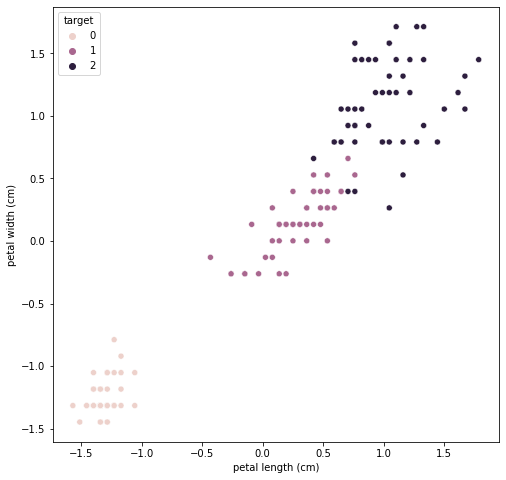

In [42]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=irisDF_selected)
plt.show()

## A. Linearly Separable Case

Consider that you want to create a model to classify leaves into setosa and not-setosa. As you can observe in **T10.**, those classes are linearly separable.

**T11.** Train a Perceptron which classify each instante into setosa (1) and not-setosa (0). In order to fulfill this tasks, consider the following:
* Modify the *target* column such that it contains a 1 if the leaf correspond to a setosa plant or 0 if does not correspond to a setosa plat (virginica or versicolor).
* Split the dataset into train and test sets. Do not forget make it in a stratified way!
* Create and fit a Perceptron Model to the Train Test.
* Evaluate the Model with the test set. Present the Confusion Matrix and Accuracy of the Model. 

In [43]:
setosa_fun = lambda x: 1 if x == 0 else 0

In [44]:
irisDF_selected.target = irisDF_selected.target.apply(setosa_fun)
irisDF_selected.head()

,petal length (cm),petal width (cm),target
0,-1.340227,-1.315444,1
1,-1.340227,-1.315444,1
2,-1.397064,-1.315444,1
3,-1.283389,-1.315444,1
4,-1.340227,-1.315444,1


In [45]:
iris_data = irisDF_selected[x]
iris_target = irisDF_selected["target"]

In [46]:
data_train, data_test, target_train, target_test = train_test_split(iris_data,iris_target, train_size = .7, stratify = iris_target, 
                                                                    random_state = 1)

In [47]:
iris_perceptron = Perceptron(n_inputs = 2, max_iterations=10, learning_rate=0.01)

In [48]:
iris_perceptron.fit(data_train, target_train)

In [49]:
y_prediction = iris_perceptron.prediction(data_test)

In [50]:
metrics.confusion_matrix(target_test, y_prediction)

array([[30,  0],
       [ 0, 15]], dtype=int64)

In [51]:
metrics.accuracy_score(target_test, y_prediction)

1.0

**T12.** Learning Curves are commonly used to validate the performance of Machine Learning Models. In this context, [2] is an interesting reference that you can read. Make a curve of the **Error Rate** (1 - Accuracy) per epoch. Modify the class in case you need it.

In [52]:
all_accuracies = iris_perceptron.generate_accuracies(data_test, target_test)

In [53]:
all_accuracies

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

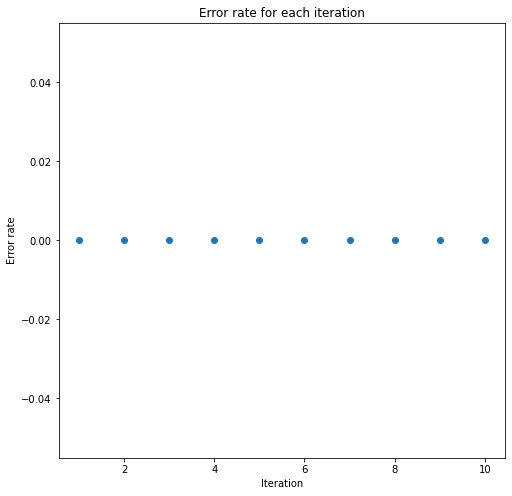

In [54]:
x_axis = range(1,len(all_accuracies)+1)
plt.scatter(x_axis, all_accuracies)
plt.xlabel("Iteration")
plt.ylabel("Error rate")
plt.title("Error rate for each iteration")
plt.show()

**T13.** Make a scatter plot of petal width (cm) (y-axis) vs petal length (cm) (x-axis). The data points must be colored according to the target variable (setosa, no-setosa). Also, include the *decision boundary*.

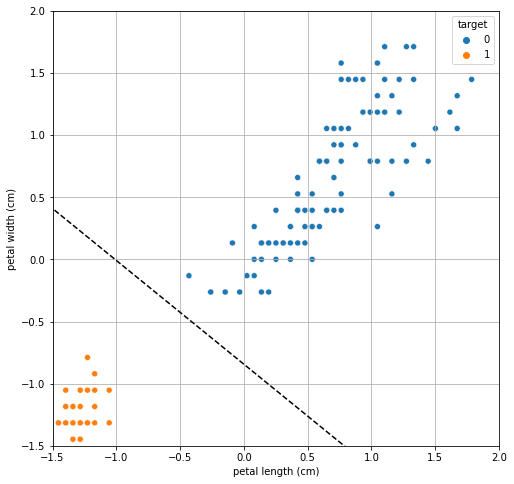

In [55]:
x_axis = np.linspace(-2,2,100)
y_axis = (- x_axis*iris_perceptron.weights[0] - iris_perceptron.bias)/iris_perceptron.weights[1]

sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=irisDF_selected)
plt.plot(x_axis, y_axis, '--',color = "black")
plt.grid()
plt.xlim([-1.5,2])
plt.ylim([-1.5,2])
plt.show()

## B. Non Linearly Separable Case

Consider that you want to create a model to classify leaves into virginica and no-virginica. As you can observe in **T10.**, those classes are not linearly separable.

**T14.** Train a Perceptron which classify each instante into virginica (1) and no-virginica (0). In order to fulfill this tasks, consider the following:
* Modify the *target* column such that it contains a 1 if the leaf correspond to a virginica plant or 0 if does not correspond to a virginica plant (setosa or versicolor).
* Split the dataset into train and test sets. Do not forget make it in a stratified way!
* Create and fit a Perceptron Model to the Train Test.
* Evaluate the Model with the test set. Present the Confusion Matrix and Accuracy of the Model. 

In [56]:
virginica_fun = lambda x: 1 if x == 2 else 0

iris_DF_selected_virginica .target = iris_DF_selected_virginica .target.apply(virginica_fun)
iris_DF_selected_virginica .head()

,petal length (cm),petal width (cm),target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


In [57]:
iris_data_virginica = iris_DF_selected_virginica[x]
iris_target_virginica = iris_DF_selected_virginica["target"]

data_train_v, data_test_v, target_train_v, target_test_v = train_test_split(iris_data_virginica,iris_target_virginica, train_size = .7, 
                                                                    stratify = iris_target_virginica, random_state = 1)

In [58]:
iris_perceptron_v = Perceptron(n_inputs = 2, max_iterations=100, learning_rate=0.01)
iris_perceptron_v.fit(data_train_v, target_train_v)

In [59]:
y_prediction_v = iris_perceptron_v.prediction(data_test_v)

In [60]:
metrics.confusion_matrix(target_test_v, y_prediction_v)

array([[30,  0],
       [ 6,  9]], dtype=int64)

In [61]:
metrics.accuracy_score(target_test_v, y_prediction_v)

0.8666666666666667

**T15.** Make a curve of the **Error Rate** (1 - Accuracy) per epoch. Modify the class in case you need it. What do you expect in this case? What can you observe in this case?

We expect the curve to showcase how the error rate goes down per epoch.

In [62]:
all_accuracies_v = iris_perceptron_v.generate_accuracies(data_test_v, target_test_v)

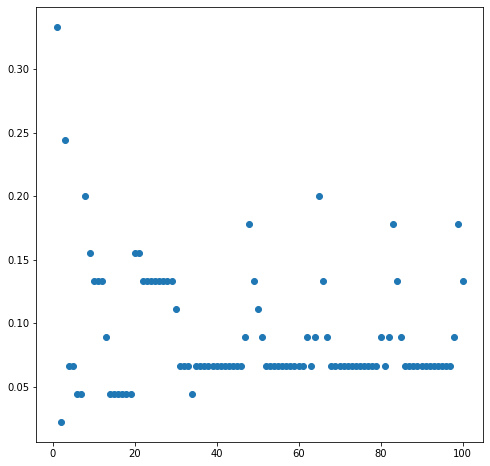

In [63]:
x_axis = range(1,len(all_accuracies_v)+1)
plt.scatter(x_axis, all_accuracies_v)
plt.show()

We got what we wanted, error rate tends to go down per epoch but then about 40 epochs in, it becomes stale and repetitive.

**T16.** Make a scatter plot of petal width (cm) (y-axis) vs petal length (cm) (x-axis). The data points must be colored according to the target variable (setosa, no-setosa). Also, include the *decision boundary*.

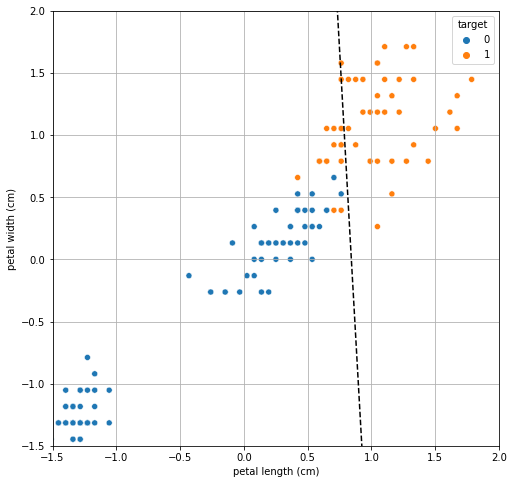

In [64]:
x_axis = np.linspace(-2,2,100)
y_axis = (- x_axis*iris_perceptron_v.weights[0] - iris_perceptron_v.bias)/iris_perceptron_v.weights[1]

sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=iris_DF_selected_virginica)
plt.plot(x_axis, y_axis, '--',color = "black")
plt.grid()
plt.xlim([-1.5,2])
plt.ylim([-1.5,2])
plt.show()

## C. Perceptron (Scikit-Learn)

Scikit-Learn implements a Perceptron Classifier in `sklearn.linear_model.Perceptron`.

**T17.** Complete tasks **T11**, **T12** and **T13** but using the Perceptron Model implemented in scikit-learn.

## Disclaimer: we did not find how to get the weight and bias for each iteration in sklearn, so we used learning_curve that gives the accuracy, but for the cross validation group

In [65]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [66]:
irisDF_selected.head()

,petal length (cm),petal width (cm),target
0,-1.340227,-1.315444,1
1,-1.340227,-1.315444,1
2,-1.397064,-1.315444,1
3,-1.283389,-1.315444,1
4,-1.340227,-1.315444,1


In [67]:
x = ["petal length (cm)", "petal width (cm)"]

In [68]:
iris_data = irisDF_selected[x]
iris_target = irisDF_selected["target"]

In [69]:
data_train, data_test, target_train, target_test = train_test_split(iris_data,iris_target, train_size = .7, stratify = iris_target, 
                                                                    random_state = 1)

In [70]:
clf = Perceptron(tol=1e-3, random_state=0, l1_ratio=0.01, max_iter=100)
clf.fit(data_train, target_train)

Perceptron(l1_ratio=0.01, max_iter=100)

In [71]:
y_prediction = clf.predict(data_test)

In [72]:
metrics.confusion_matrix(target_test, y_prediction)

array([[30,  0],
       [ 0, 15]], dtype=int64)

In [73]:
metrics.accuracy_score(target_test, y_prediction)

1.0

In [74]:
train_sizes, train_scores, valid_scores = learning_curve(clf, iris_data, iris_target, train_sizes=[70], cv=5)

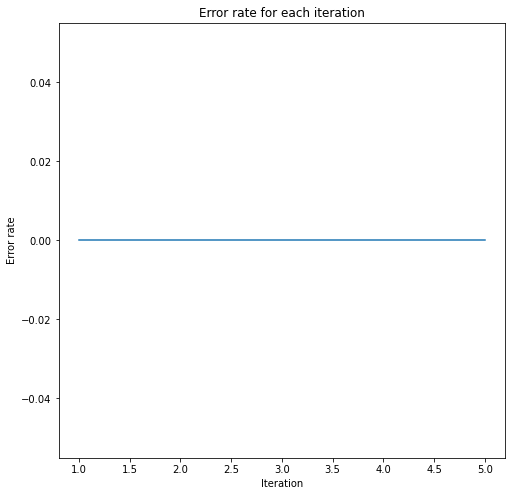

In [75]:
valid_scores = 1-valid_scores
plt.plot(range(1,valid_scores.shape[1]+1),valid_scores[0])
plt.xlabel("Iteration")
plt.ylabel("Error rate")
plt.title("Error rate for each iteration")
plt.show()

As you can see since the first iteration it gets the error rate equal to 0

In [76]:
x_axis = np.linspace(-2,2,100)

b, b1 = clf.coef_[0]
intercept = clf.intercept_

y_axis = (- x_axis*b - intercept)/b1

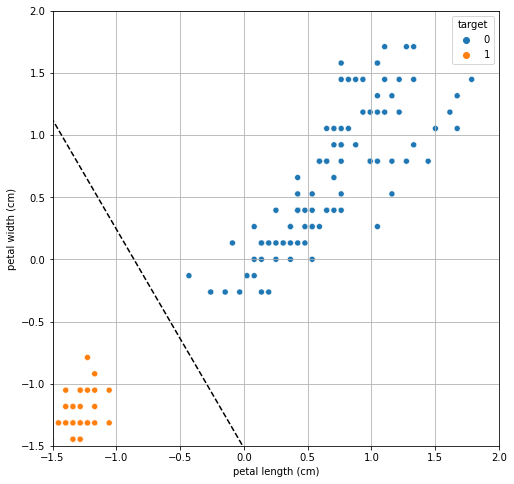

In [77]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=irisDF_selected)
plt.plot(x_axis, y_axis, '--',color = "black")
plt.grid()
plt.xlim([-1.5,2])
plt.ylim([-1.5,2])
plt.show()

**T18.** Complete tasks **T14**, **T15** and **T16** but using the Perceptron Model implemented in scikit-learn.

In [78]:
data_train_v, data_test_v, target_train_v, target_test_v = train_test_split(iris_data_virginica,iris_target_virginica, train_size = .7, 
                                                                    stratify = iris_target_virginica, random_state = 1)

In [79]:
clf = Perceptron(tol=1e-3, random_state=0, l1_ratio=0.01, max_iter=100)
clf.fit(data_train_v, target_train_v)

Perceptron(l1_ratio=0.01, max_iter=100)

In [80]:
y_prediction = clf.predict(data_test_v)

In [81]:
metrics.confusion_matrix(target_test_v, y_prediction_v)

array([[30,  0],
       [ 6,  9]], dtype=int64)

In [82]:
metrics.accuracy_score(target_test_v, y_prediction_v)

0.8666666666666667

In [83]:
iris_data_virginica.shape

(150, 2)

In [84]:
train_sizes, train_scores, valid_scores = learning_curve(clf, iris_data_virginica, iris_target_virginica, train_sizes=[90], cv=5)

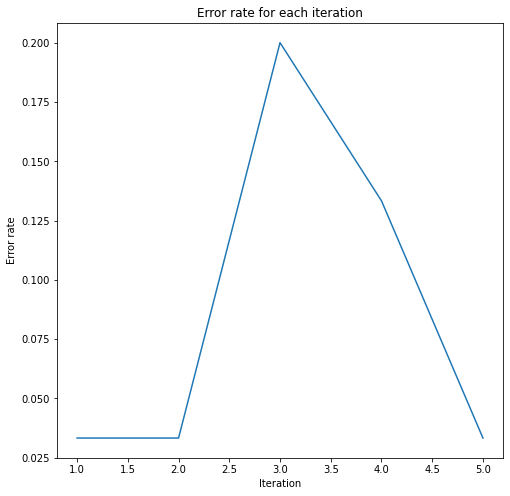

In [85]:
# La grafica no es similiar al anterior porque el la funcion learning curve y la funcion perception
valid_scores = 1-valid_scores
plt.plot(range(1,valid_scores.shape[1]+1),valid_scores[0])
plt.xlabel("Iteration")
plt.ylabel("Error rate")
plt.title("Error rate for each iteration")
plt.show()

In [86]:
x_axis = np.linspace(-2,2,100)
b, b1 = clf.coef_[0]
intercept = clf.intercept_

y_axis = (- x_axis*b - intercept)/b1

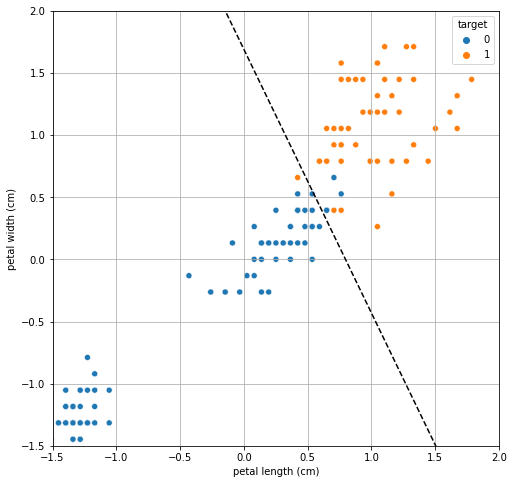

In [87]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=iris_DF_selected_virginica)
plt.plot(x_axis, y_axis, '--',color = "black")
plt.grid()
plt.xlim([-1.5,2])
plt.ylim([-1.5,2])
plt.show()

## Additional Material

[1] Deep Learning (PyTorch) from Udacity's Repository: https://github.com/udacity/deep-learning-v2-pytorch

[2] How to use Learning Curves to Diagnose Machine Learning Model Performance: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/ 